<a href="https://colab.research.google.com/github/LouisP96/Neural_Networks_from_Scratch/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/GitHub/

/content/drive/MyDrive/GitHub


In [20]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [24]:
# Load dataset

trainxs = np.load("Data/fashion-train-imgs.npz")
trainys = np.load("Data/fashion-train-labels.npz")
devxs = np.load("Data/fashion-dev-imgs.npz")
devys = np.load("Data/fashion-dev-labels.npz")
testxs = np.load("Data/fashion-test-imgs.npz")
testys = np.load("Data/fashion-test-labels.npz")

Y Label: 0


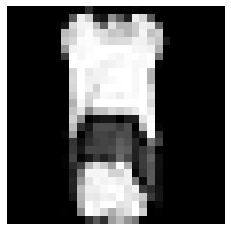

Y Label: 0


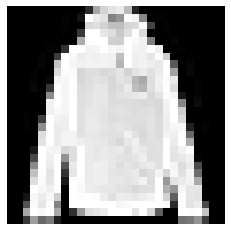

In [25]:
# Display an example image with label, specify number below

examples_to_show = list(range(40,42))

for example in examples_to_show:
  print(f"Y Label: {trainys[example]}")

  plt.imshow(trainxs[:, :, example].T, cmap='gray')
  plt.axis('off')
  plt.show()

In [34]:
# Reshape data (flatten images to 1D)

def flatten_2D_images(nparray):
  return np.reshape(nparray, (nparray.shape[0]*nparray.shape[1], nparray.shape[2]))

trainxs_flat = flatten_2D_images(trainxs)
devxs_flat = flatten_2D_images(devxs)
testxs_flat = flatten_2D_images(testxs)

print(f"Original train data shape: {trainxs.shape}")
print(f"Flattened train data shape: {trainxs_flat.shape}")
print(f"Original dev data shape: {devxs.shape}")
print(f"Flattened dev data shape: {devxs_flat.shape}")
print(f"Original test data shape: {testxs.shape}")
print(f"Flattened test data shape: {testxs_flat.shape}")

Original train data shape: (28, 28, 12000)
Flattened train data shape: (784, 12000)
Original dev data shape: (28, 28, 1000)
Flattened dev data shape: (784, 1000)
Original test data shape: (28, 28, 1000)
Flattened test data shape: (784, 1000)


In [35]:
# Number of examples in each dataset
train_n = trainxs_flat.shape[1]
dev_n = devxs_flat.shape[1]
test_n = testxs_flat.shape[1]

# Number of dimesions in each image
dims = trainxs_flat.shape[0]

# Pixel value range
pixel_value_max = np.amax(trainxs_flat)
pixel_value_min = np.amin(trainxs_flat)
print(f"Max pixel value: {pixel_value_max}")
print(f"Min pixel value: {pixel_value_min}")

NUMBER_OF_EPOCHS = 500

Max pixel value: 1.0
Min pixel value: 0.0


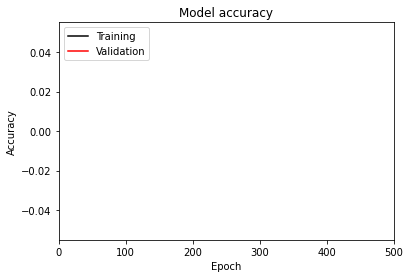

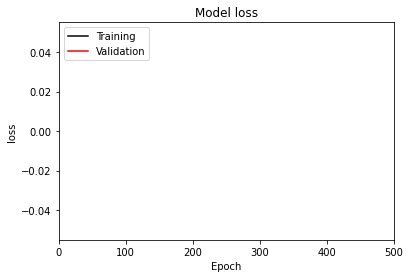

In [36]:
# The input for each is two lists one for training dataset, and one for the dev dataset

# Accuracy
list_of_train_accuracies = [] 
list_of_dev_accuracies = []

plt.plot(list_of_train_accuracies, color='k', linestyle='-')
plt.plot(list_of_dev_accuracies, color='r', linestyle='-')
plt.title(f'Model accuracy',  color='k')
plt.ylabel('Accuracy',  color='k')
plt.xlabel('Epoch',  color='k')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.tick_params(colors='k')
plt.xlim(0, NUMBER_OF_EPOCHS)
# plt.savefig("accuracy_plot.png", dpi=300)
plt.show()

# Loss
list_of_train_loss = []
list_of_dev_loss = []

plt.plot(list_of_train_loss, color='k', linestyle='-')
plt.plot(list_of_dev_loss, color='r', linestyle='-')
plt.title(f'Model loss',  color='k')
plt.ylabel('loss',  color='k')
plt.xlabel('Epoch',  color='k')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.tick_params(colors='k')
plt.xlim(0, NUMBER_OF_EPOCHS)
# plt.savefig("loss_plot.png", dpi=300)
plt.show()


In [37]:
# Code to generate random indices to shuffle going through training dataset
# (include shuffled_indices as the iterator in training for loop)

shuffled_indices = [*range(0, train_n, 1)]
np.random.shuffle(shuffled_indices)

In [43]:
# Early stopping code

# if len(train_accuracy_per_epoch) >= 30:
#   if (np.mean(train_accuracy_per_epoch[-20:]) - np.mean(train_accuracy_per_epoch[-30:-10])) < 0:
#     print("break")
#     break 